# HW1 Coding Part


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
#!pip install torchvision
from torchvision import datasets
from sklearn.datasets import make_blobs



# Question 2


Part a

In [2]:
# Question2
# a
#Implement the k-means algorithm

# Calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return math.dist(p1,p2)

# Create KMeans class
class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, data):
        # Initialize random cluster centroids
        centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]
        
        # Initialize distortion list to track convergence speed
        distortions = []
        
        for iters in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = []
            for point in data:
                distances = [euclidean_distance(point, centroid) for centroid in centroids]
                labels.append(np.argmin(distances))
                # returns the indices of the minimum distance between point and centroid

            # Compute distortion and append to list
            distortion = 0
            for i in range(self.k):
                cluster_points = data[np.array(labels) == i]
                for point in cluster_points:
                    distortion += euclidean_distance(point, centroids[i])**2
                
            distortions.append(distortion)
            
            # Update centroids
            new_centroids = []
            for i in range(self.k):
                cluster_points = data[np.array(labels) == i]
                new_centroid = np.mean(cluster_points, axis=0)
                new_centroids.append(new_centroid)
            new_centroids = np.array(new_centroids)           
            
            # Check for convergence
            if np.allclose(centroids, new_centroids, atol=self.tol):
                break

            centroids = new_centroids
            
        #self.iter = iters+1
        self.labels_ = np.array(labels)
        self.cluster_centers_ = centroids
        self.distortions_ = distortions

        return self




In [3]:
# Load data from toydata.txt
data = np.loadtxt("toydata.txt")

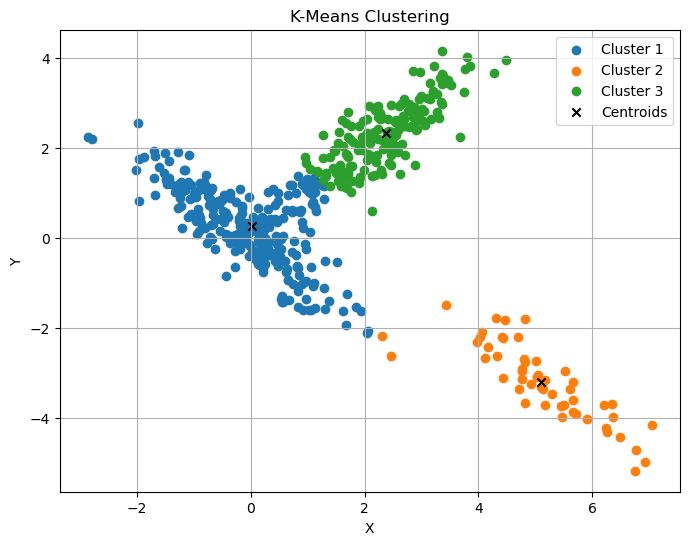

In [4]:
# Perform k-means clustering
kmeans = KMeans(k=3)
kmeans.fit(data)

# Plot the final result
plt.figure(figsize=(8, 6))
for i in range(kmeans.k):
    cluster_points = data[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
print("The number of iterations needed in kmeans algorithm :", len(kmeans.distortions_))

The number of iterations needed in kmeans algorithm : 10


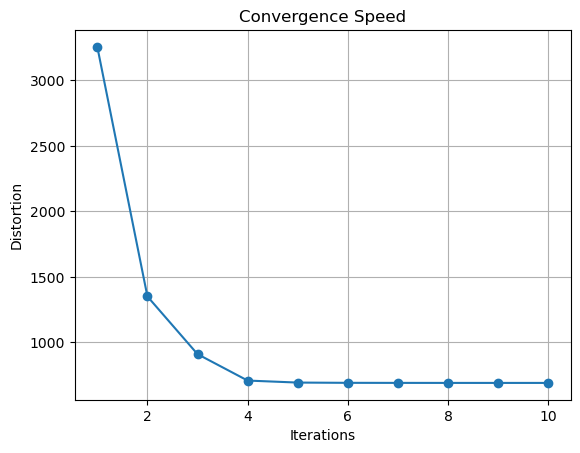

In [6]:
# Plot convergence speed

plt.plot(range(1, len(kmeans.distortions_) + 1), kmeans.distortions_, marker='o')
plt.title('Convergence Speed')
plt.xlabel('Iterations')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

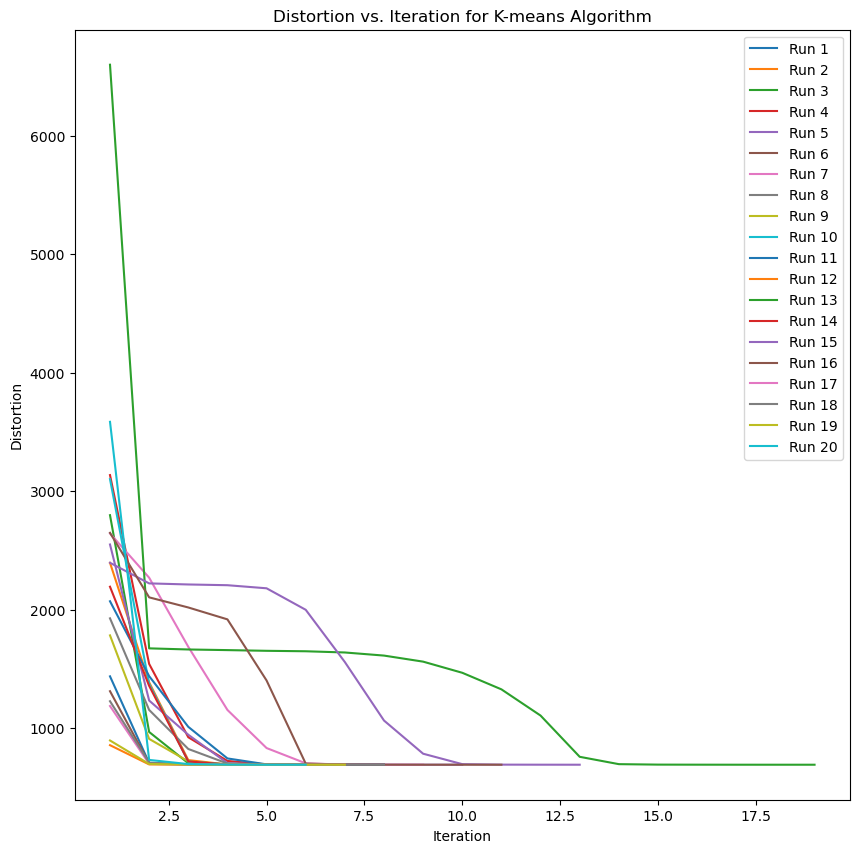

In [7]:
# Run k-means algorithm 20 times
# Plot the value of the distortion function as a function 
# of iteration number for 20 sepearate runs of the algorithm on the same plot

all_distortions = []
n_runs = 20
for _ in range(n_runs):
    kmeans = KMeans(k=3)
    kmeans.fit(data)
    all_distortions.append(kmeans.distortions_)

# Plot the distortions
plt.figure(figsize = (10,10))
for i, distortions in enumerate(all_distortions):
    plt.plot(range(1, len(distortions)+1), distortions, label=f'Run {i+1}')


plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.title('Distortion vs. Iteration for K-means Algorithm')
plt.legend()
plt.show()

Comment:


In the "K-mean Clustering" plot, the k-means algorithm proficiently segregates datapoints into three distinct groups. Moreover, in the plot 'Distortion vs. Iteration for K-means Algorithm,' we notice a consistent decrease in distortion values with the increase in the number of iterations across all 20 iterations. This observation validates 1c, where we mathematically established that the distortion value does not increase.


In [8]:
#b
# Implementing KMeans class with k-means++ initialization
import random
class KMeansPlusPlus:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def _initialize_centroids(self, data):
        
        centers = [random.choice(data)]
        while len(centers) < self.k:
            distances = [min([euclidean_distance(point, center) for center in centers]) for point in data]
            totalDistance = sum(distances)
            probabilities = [distance / totalDistance for distance in distances]
            nextCenterIndex = random.choices(range(len(data)), probabilities)[0]
            centers.append(data[nextCenterIndex])
        # Calculate distances from each point to the nearest center
        return np.array(centers)

    def fit(self, data):
        # Initialize random cluster centroids
        centroids = self._initialize_centroids(data)
        
        # Initialize distortion list to track convergence speed
        distortions = []
        
        for iters in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = []
            for point in data:
                distances = [euclidean_distance(point, centroid) for centroid in centroids]
                labels.append(np.argmin(distances))
                # returns the indices of the minimum distance between point and centroid

            # Compute distortion and append to list
            distortion = 0
            for i in range(self.k):
                cluster_points = data[np.array(labels) == i]
                for point in cluster_points:
                    distortion += euclidean_distance(point, centroids[i])**2
            distortions.append(distortion)
            
            # Update centroids
            new_centroids = []
            for i in range(self.k):
                cluster_points = data[np.array(labels) == i]
                new_centroid = np.mean(cluster_points, axis=0)
                new_centroids.append(new_centroid)
            new_centroids = np.array(new_centroids)           
            
            # Check for convergence
            if np.allclose(centroids, new_centroids, atol=self.tol):
                break

            centroids = new_centroids
            
        #self.iter = iters+1
        self.labels_ = np.array(labels)
        self.cluster_centers_ = centroids
        self.distortions_ = distortions

        return self


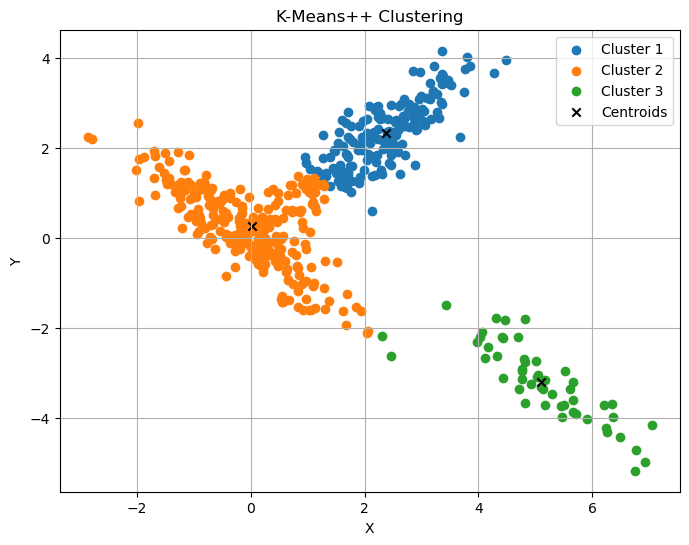

In [9]:
# Load data from toydata.txt
data = np.loadtxt("toydata.txt")

# Perform k-means++ clustering
kmeans_pp = KMeansPlusPlus(k=3)
kmeans_pp.fit(data)


# Plot the final result
plt.figure(figsize=(8, 6))
for i in range(kmeans_pp.k):
    cluster_points = data[kmeans_pp.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('K-Means++ Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
print("The number of iterations needed in kMeans++ algorithm :",len(kmeans_pp.distortions_))

The number of iterations needed in kMeans++ algorithm : 8


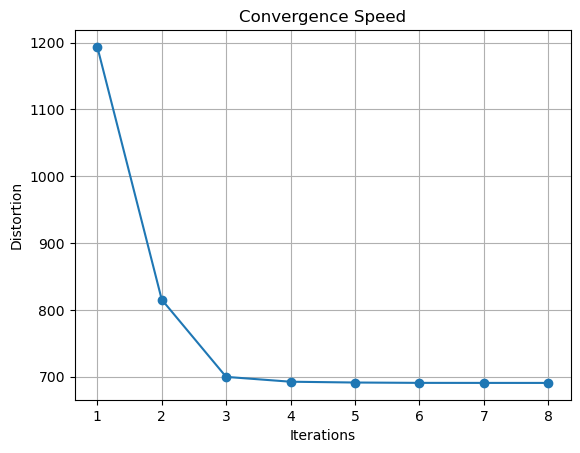

In [11]:
# Plot convergence speed

plt.plot(range(1, len(kmeans_pp.distortions_) + 1), kmeans_pp.distortions_, marker='o')
plt.title('Convergence Speed')
plt.xlabel('Iterations')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

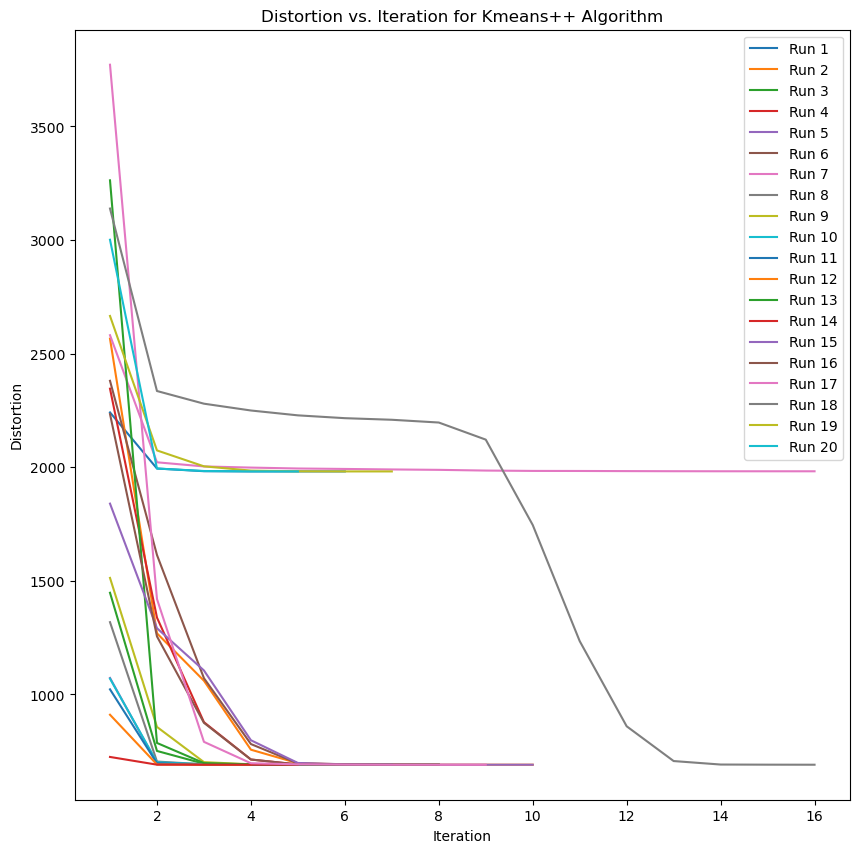

In [12]:
# Run k-means++ algorithm 20 times
all_distortions = []
n_runs = 20
for _ in range(n_runs):
    kmeans_pp = KMeansPlusPlus(k=3)
    kmeans_pp.fit(data)
    all_distortions.append(kmeans_pp.distortions_)

# Plot the distortions
plt.figure(figsize = (10,10))
for i, distortions in enumerate(all_distortions):
    plt.plot(range(1, len(distortions)+1), distortions, label=f'Run {i+1}')


plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.title('Distortion vs. Iteration for Kmeans++ Algorithm')
plt.legend()
plt.show()

In [13]:
# Discuss with XinLin Zhou
n=20
kmeansDistortions = []
kmeansIterations = []
kmeansPP_Distortions = []
kmeansPP_Iterations = []

# Store the distortions and iterations for both method
for _ in range(n):
    kmeans = KMeans(k=3)
    kmeans.fit(data)
    kmeansDistortions.append(kmeans.distortions_)
    kmeansIterations.append(len(kmeans.distortions_))
    
    kmeans_pp = KMeansPlusPlus(k=3)
    kmeans_pp.fit(data)
    kmeansPP_Distortions.append(kmeans_pp.distortions_)
    kmeansPP_Iterations.append(len(kmeans_pp.distortions_))
    
print("Algorithm k-mean:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansIterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansDistortions]))

print(  )

print("Algorithm k-mean++:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansPP_Iterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansPP_Distortions]))




Algorithm k-mean:
Average Number of Iterations needed before Convergence: 8.5
Average Distortion Function Value of the Final Clustering: 1013.4405004049861

Algorithm k-mean++:
Average Number of Iterations needed before Convergence: 8.45
Average Distortion Function Value of the Final Clustering: 690.7118435493169


Observation: By producing better initial centroids, K-means++ can lead to faster convergence and more accurate clustering results than k-means

Part C

In [14]:
# Load MNIST dataset
# Discuss with Xinlin Zhou
mnist_trainset = datasets.MNIST(root='./data', train=True,  download=True, transform=None)
mnist_testset  = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Combine train and test sets
mnist_data = list(mnist_trainset.data.numpy()) + list(mnist_testset.data.numpy())
mnist_data = [img.flatten() for img in mnist_data]
# Modify from unsigned 8bits to signed 16 bits to prevent overflow during subtractionn
mnist_data = [arr.astype(np.int16) for arr in mnist_data]



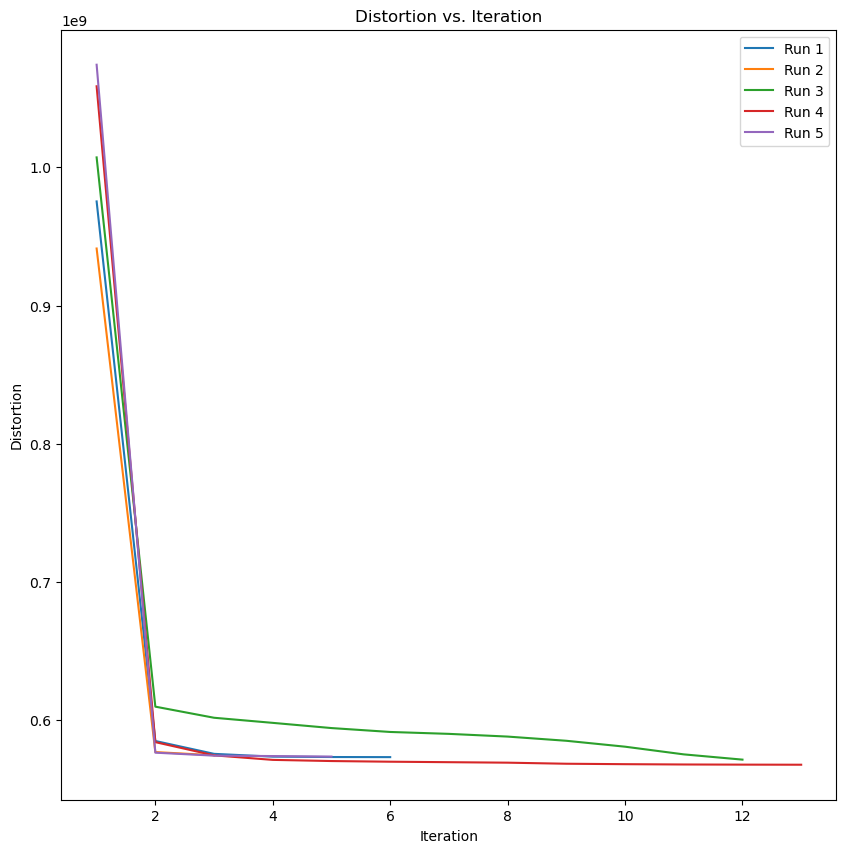

When the cluster number is  3
Average Number of Iterations Until Convergent: 7.8
Average Distortion Function Value of the Final Clustering: 572125396.903507


In [15]:
c=3
n_runs = 5
data = np.array(mnist_data[0:200])
# Run k-means algorithm
kMeanDistortions = []
iterations = []
for _ in range(n_runs):
    kmeans = KMeans(k=c)
    kmeans.fit(data)
    kMeanDistortions.append(kmeans.distortions_)
    iterations.append(len(kmeans.distortions_))

# Plot the distortions
plt.figure(figsize = (10,10))
for i, distortions in enumerate(kMeanDistortions):
    plt.plot(range(1, len(distortions)+1), distortions, label=f'Run {i+1}')


plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.title('Distortion vs. Iteration')
plt.legend()
plt.show()

print("When the cluster number is ", c)
print("Average Number of Iterations Until Convergent:", np.mean(iterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kMeanDistortions]))

In [16]:

c=3
n=20
kmeansDistortions = []
kmeansIterations = []
kmeansPP_Distortions = []
kmeansPP_Iterations = []
for _ in range(n):
    
    kmeans = KMeans(k=c)
    kmeans.fit(data)
    kmeansDistortions.append(kmeans.distortions_)
    kmeansIterations.append(len(kmeans.distortions_))
    
    kmeans_pp = KMeansPlusPlus(k=3)
    kmeans_pp.fit(data)
    kmeansPP_Distortions.append(kmeans_pp.distortions_)
    kmeansPP_Iterations.append(len(kmeans_pp.distortions_))
    

print("When k =",c)
    
print("Algorithm k-mean:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansIterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansDistortions]))

print(  )

print("Algorithm k-mean++:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansPP_Iterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansPP_Distortions]))




When k = 3
Algorithm k-mean:
Average Number of Iterations needed before Convergence: 10.6
Average Distortion Function Value of the Final Clustering: 570888637.3579054

Algorithm k-mean++:
Average Number of Iterations needed before Convergence: 9.5
Average Distortion Function Value of the Final Clustering: 571249889.9509997


In [17]:

c=10
n=20
kmeansDistortions = []
kmeansIterations = []
kmeansPP_Distortions = []
kmeansPP_Iterations = []
for _ in range(n):
    kmeans = KMeans(k=c)
    kmeans.fit(data)
    kmeansDistortions.append(kmeans.distortions_)
    kmeansIterations.append(len(kmeans.distortions_))
    
    kmeans_pp = KMeansPlusPlus(k=3)
    kmeans_pp.fit(data)
    kmeansPP_Distortions.append(kmeans_pp.distortions_)
    kmeansPP_Iterations.append(len(kmeans_pp.distortions_))

print("When k =",c)
print("Algorithm k-mean:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansIterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansDistortions]))

print(  )

print("Algorithm k-mean++:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansPP_Iterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansPP_Distortions]))




When k = 10
Algorithm k-mean:
Average Number of Iterations needed before Convergence: 8.25
Average Distortion Function Value of the Final Clustering: 451325414.3541255

Algorithm k-mean++:
Average Number of Iterations needed before Convergence: 9.85
Average Distortion Function Value of the Final Clustering: 571150751.6511426


In [18]:

c=16
n=20
kmeansDistortions = []
kmeansIterations = []
kmeansPP_Distortions = []
kmeansPP_Iterations = []
for _ in range(n):
    kmeans = KMeans(k=c)
    kmeans.fit(data)
    kmeansDistortions.append(kmeans.distortions_)
    kmeansIterations.append(len(kmeans.distortions_))
    
    kmeans_pp = KMeansPlusPlus(k=3)
    kmeans_pp.fit(data)
    kmeansPP_Distortions.append(kmeans_pp.distortions_)
    kmeansPP_Iterations.append(len(kmeans_pp.distortions_))

print("When k =",c)
print("Algorithm k-mean:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansIterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansDistortions]))

print(  )

print("Algorithm k-mean++:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansPP_Iterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansPP_Distortions]))




When k = 16
Algorithm k-mean:
Average Number of Iterations needed before Convergence: 8.8
Average Distortion Function Value of the Final Clustering: 397888345.5327799

Algorithm k-mean++:
Average Number of Iterations needed before Convergence: 9.45
Average Distortion Function Value of the Final Clustering: 570721195.1329902


Observation: After multiple attempts and from the results above, we can see the number of iterations required decreases as the value of k increases, for both k-means and k-means++. Similarly, the distortion values decrease with increasing k. (There might be slightly changes each time we run the code).

# Question 3

Part G

/var/folders/t2/7mtp11ks3nnd0l6dwsngdl680000gn/T/ipykernel_5263/1664176674.py:41: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihood = np.sum(np.log(np.sum(weights[k] * gaussian(data, means[k], covariances[k]) for k in range(n_clusters))))


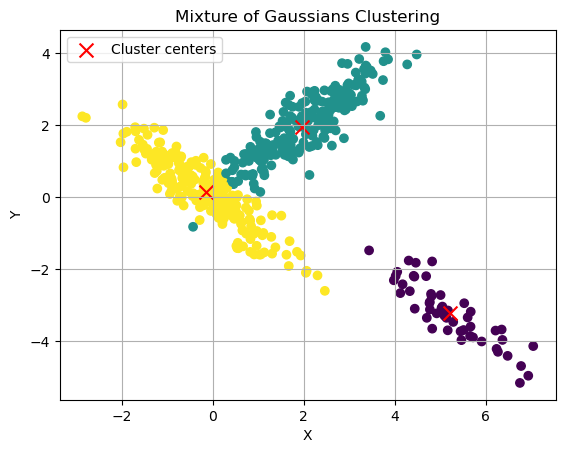

In [19]:
# Part G


np.random.seed(0)
data = np.loadtxt("toydata.txt")

# Function to calculate Gaussian probability
def gaussian(x, mean, cov):
    d = x.shape[0]
    coeff = 1 / ((2 * np.pi) ** (d / 2) * np.linalg.det(cov) ** 0.5)
    exponent = -0.5 * np.sum(np.dot(x - mean, np.linalg.inv(cov)) * (x - mean), axis=1)
    return coeff * np.exp(exponent)

# Mixture of Gaussians algorithm with convergence speed calculation
def GMM(data, n_clusters, max_iter=100, tol=1e-4):
    n_samples, n_features = data.shape
    log_likelihoods = []

    # Initialization
    means = data[np.random.choice(n_samples, n_clusters, replace=False)]
    covariances = np.array([np.eye(n_features)] * n_clusters)
    weights = np.ones(n_clusters) / n_clusters
    responsibilities = np.zeros((n_samples, n_clusters))

    # Iterate until convergence
    for iter in range(max_iter):
        # E-step: Compute responsibilities
        for k in range(n_clusters):
            responsibilities[:, k] = weights[k] * gaussian(data, means[k], covariances[k])
        responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]

        # M-step: Update parameters
        Nk = responsibilities.sum(axis=0)
        weights = Nk / n_samples
        means = np.dot(responsibilities.T, data) / Nk[:, np.newaxis]
        for k in range(n_clusters):
            diff = data - means[k]
            covariances[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]

        # Compute log-likelihood
        log_likelihood = np.sum(np.log(np.sum(weights[k] * gaussian(data, means[k], covariances[k]) for k in range(n_clusters))))
        log_likelihoods.append(log_likelihood)

        # Check for convergence
        if iter > 0 and np.abs(log_likelihood - log_likelihoods[iter-1]) < tol:
            break

    return means, covariances, weights, responsibilities, log_likelihoods

# Perform clustering and compute convergence speed
n_clusters = 3
means, covariances, weights, responsibilities, log_likelihoods = GMM(data, n_clusters)

# Plot data and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=np.argmax(responsibilities, axis=1), cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], marker='x', color='red', s=100, label='Cluster centers')
plt.title('Mixture of Gaussians Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/t2/7mtp11ks3nnd0l6dwsngdl680000gn/T/ipykernel_5263/1664176674.py:41: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihood = np.sum(np.log(np.sum(weights[k] * gaussian(data, means[k], covariances[k]) for k in range(n_clusters))))


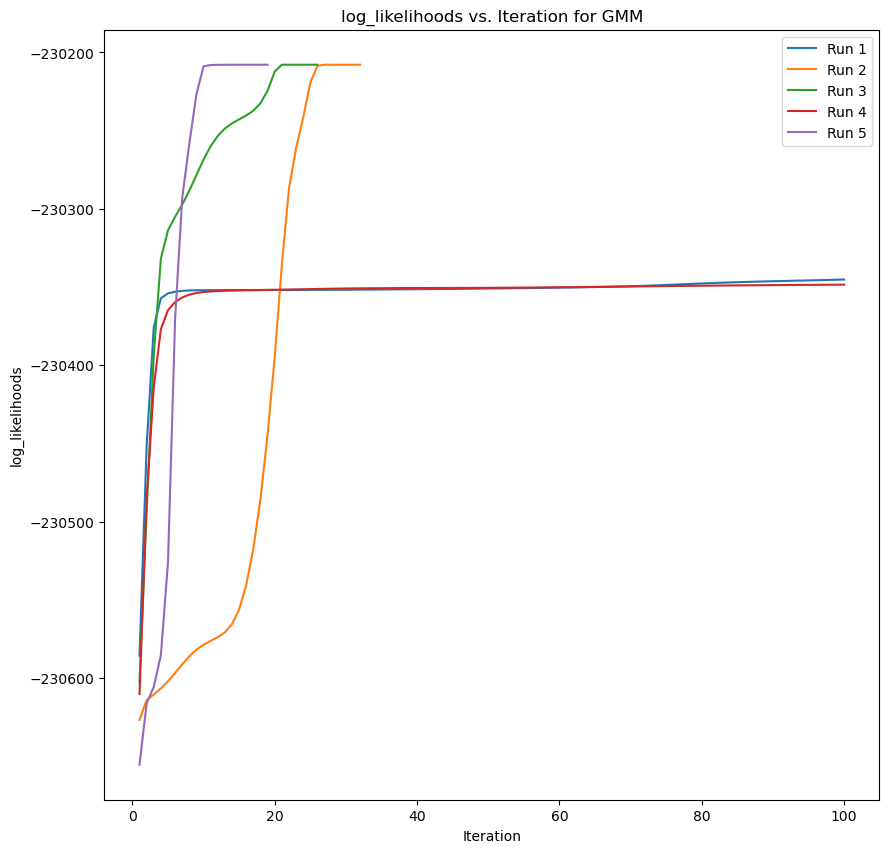

In [20]:
# Run GMM algorithm 5 times
n_runs=5
all_log_likelihoods = []
for _ in range(n_runs):
    means, covariances, weights, responsibilities, log_likelihoods = GMM(data, n_clusters)
    all_log_likelihoods.append(log_likelihoods)

# Plot the distortions
plt.figure(figsize = (10,10))
for i, distortions in enumerate(all_log_likelihoods):
    plt.plot(range(1, len(distortions)+1), distortions, label=f'Run {i+1}')


plt.xlabel('Iteration')
plt.ylabel('log_likelihoods')
plt.title('log_likelihoods vs. Iteration for GMM')
plt.legend()
plt.show()

In [21]:
#Discuss with XinLin Zhou
n=10
kmeansDistortions = []
kmeansIterations = []

GMM_log_likelihoods = []
GMM_Iterations = []
for _ in range(n_runs):
    means, covariances, weights, responsibilities, log_likelihoods = GMM(data, n_clusters)
    GMM_log_likelihoods.append(log_likelihoods)
    
    
kmeansPP_Distortions = []
kmeansPP_Iterations = []
for _ in range(n):
    kmeans = KMeans(k=3)
    kmeans.fit(data)
    # Store the distortions and iterations for both method
    kmeansDistortions.append(kmeans.distortions_)
    kmeansIterations.append(len(kmeans.distortions_))
    
    
    means, covariances, weights, responsibilities, log_likelihoods = GMM(data, n_clusters)
    GMM_log_likelihoods.append(log_likelihoods)
    GMM_Iterations.append(len(log_likelihoods))

    

    
print("Algorithm k-mean:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansIterations))

print(  )

print("Algorithm GMM:")
print("Average Number of Iterations needed before Convergence:", np.mean(GMM_Iterations))



/var/folders/t2/7mtp11ks3nnd0l6dwsngdl680000gn/T/ipykernel_5263/1664176674.py:41: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihood = np.sum(np.log(np.sum(weights[k] * gaussian(data, means[k], covariances[k]) for k in range(n_clusters))))


Algorithm k-mean:
Average Number of Iterations needed before Convergence: 9.1

Algorithm GMM:
Average Number of Iterations needed before Convergence: 33.2


After examining the clustering plots generated by GMM and k-means, it becomes evident that GMM exhibits greater flexibility in cluster shape and handles mixed membership more naturally. Additionally, GMM demonstrates greater robustness to noise and outliers compared to k-means. On the other hand, k-means assumes spherical clusters, provides hard assignments, and is more sensitive to outliers.

In terms of convergence speed, we observe that k-means converges more rapidly

# Question 4


After multiple attempts, we found that when dealing with thousands of data points clustered tightly but not uniformly around a few distant points, K-means++ outperforms the basic K-means algorithm. Thus, we design our data set as follow: 

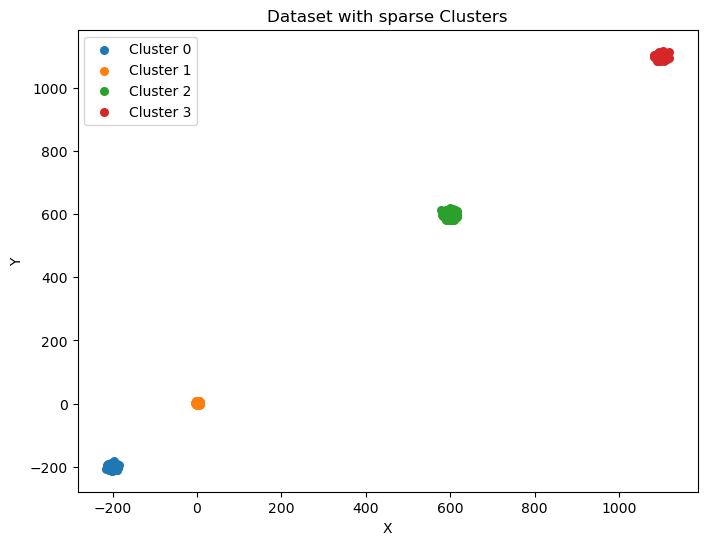

In [22]:


# Discuss with XinLin Zhou
# Get help from Chatgpt about generating data

# Generate clusters with varying sizes and densities
centers = [[-200, -200], [2, 2], [600, 600],[1100, 1100]]  # Centers of clusters
clusters_std = [5.0, 2.0, 7.0,6.0]  # Standard deviation of clusters
n_samples = [500, 1000, 300,300]  # Number of samples in each cluster

# Generate the dataset with labels
X, y = make_blobs(n_samples=n_samples, cluster_std=clusters_std, centers=centers, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
for i in range(len(centers)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Cluster {i}', s=30)
plt.title('Dataset with sparse Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


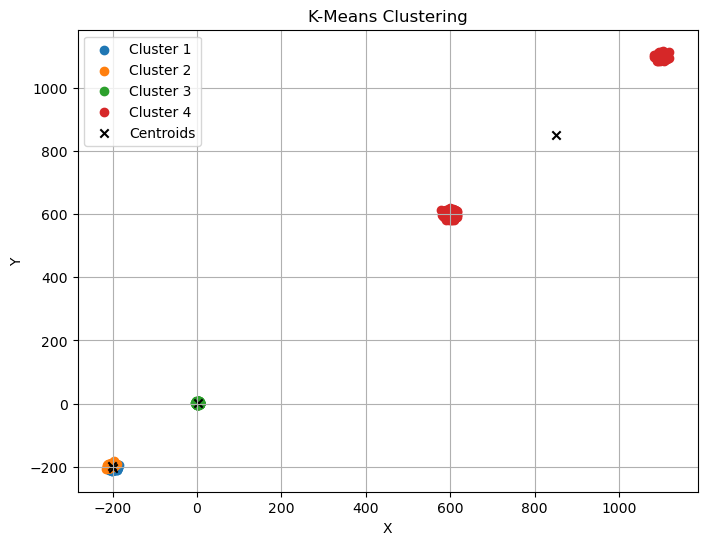

In [23]:
data=X
# Perform k-means clustering
kmeans = KMeans(k=4)
kmeans.fit(data)

# Plot the final result
plt.figure(figsize=(8, 6))
for i in range(kmeans.k):
    cluster_points = data[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

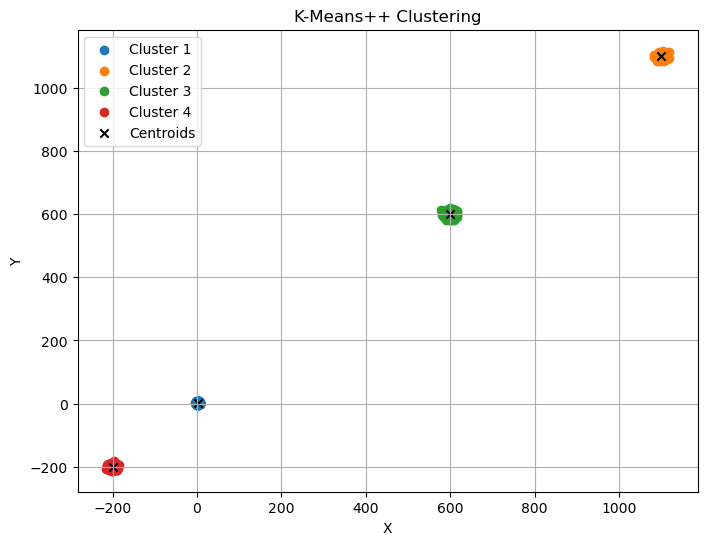

In [24]:
# Perform k-means++ clustering
kmeans_pp = KMeansPlusPlus(k=4)
kmeans_pp.fit(data)


# Plot the final result
plt.figure(figsize=(8, 6))
for i in range(kmeans_pp.k):
    cluster_points = data[kmeans_pp.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('K-Means++ Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
n=20
kmeansDistortions = []
kmeansIterations = []
kmeansPP_Distortions = []
kmeansPP_Iterations = []
for _ in range(n):
    kmeans = KMeans(k=3)
    kmeans.fit(data)
    # Store the distortions and iterations for both method
    kIteration=len(kmeans.distortions_)
    kDistortion=kmeans.distortions_
    
    kmeans_pp = KMeansPlusPlus(k=3)
    kmeans_pp.fit(data)
    # Store the distortions and iterations for both method
    kppIteration=len(kmeans_pp.distortions_)
    kppDistortion=kmeans_pp.distortions_

    
    kmeansDistortions.append(kDistortion)
    kmeansIterations.append(kIteration)
    
    kmeansPP_Distortions.append(kppDistortion)
    kmeansPP_Iterations.append(kppIteration)
    
print("Algorithm k-mean:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansIterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansDistortions]))

print(  )

print("Algorithm k-mean++:")
print("Average Number of Iterations needed before Convergence:", np.mean(kmeansPP_Iterations))
print("Average Distortion Function Value of the Final Clustering:", np.mean([dis[-1] for dis in kmeansPP_Distortions]))





Algorithm k-mean:
Average Number of Iterations needed before Convergence: 2.8
Average Distortion Function Value of the Final Clustering: 70212869.24658546

Algorithm k-mean++:
Average Number of Iterations needed before Convergence: 2.0
Average Distortion Function Value of the Final Clustering: 48747749.1957414


In [26]:
print("Distortions difference (k-means++ - kmeans): ",(np.mean([dis[-1] for dis in kmeansPP_Distortions])-np.mean(kmeansPP_Iterations)) )

Distortions difference (k-means++ - kmeans):  48747747.1957414


As we can see k-means++ improves the performance of k–means by 51132760.48472408 in terms of distortion values.